<a href="https://colab.research.google.com/github/JairoAcevedo-BitCrafter/intro2nlp/blob/main/Discussion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applying some basic libraries for NLP trext prepocessing**


Downloading every used library

In [1]:
import nltk
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import nltk
from nltk.corpus import gutenberg
moby=gutenberg.raw(fileids='melville-moby_dick.txt')
print(len(moby)," words","\n", moby[0:200])

1242990  words 
 [Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was


In [3]:
import pandas as pd
st = nltk.sent_tokenize
moby_sent = st(text=moby)
mobydf=pd.DataFrame(moby_sent, columns=['Sentence'])
print(len(moby)," words","\n", moby[0:200])

1242990  words 
 [Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was


In [4]:
def lower_case(text):
  return text.lower()
mobydf['Sentence']=mobydf['Sentence'].apply(lower_case)
print(len(mobydf)," words","\n", mobydf[0:200])

9852  words 
                                               Sentence
0    [moby dick by herman melville 1851]\r\n\r\n\r\...
1    (supplied by a late consumptive usher to a gra...
2    he was ever dusting his old lexicons and gramm...
3    he loved to dust his old grammars; it\r\nsomeh...
4    "while you take in hand to school others, and ...
..                                                 ...
195                    mr. chace, what is the matter?"
196    i answered, "we have been\r\nstove by a whale."
197  --"narrative of the shipwreck of the whale shi...
198  by owen chace of nantucket,\r\nfirst mate of s...
199                                    new york, 1821.

[200 rows x 1 columns]


In [5]:
def rem_lines(text):
    return text.strip().replace('\n', ' ')
mobydf['Sentence']=mobydf['Sentence'].astype(str).apply(rem_lines)
print(len(mobydf)," words","\n", mobydf[0:200])

9852  words 
                                               Sentence
0    [moby dick by herman melville 1851]\r \r \r et...
1    (supplied by a late consumptive usher to a gra...
2    he was ever dusting his old lexicons and gramm...
3    he loved to dust his old grammars; it\r someho...
4    "while you take in hand to school others, and ...
..                                                 ...
195                    mr. chace, what is the matter?"
196     i answered, "we have been\r stove by a whale."
197  --"narrative of the shipwreck of the whale shi...
198  by owen chace of nantucket,\r first mate of sa...
199                                    new york, 1821.

[200 rows x 1 columns]


In [6]:
from bs4 import BeautifulSoup
def rem_tags(text):
  return BeautifulSoup(text, "html.parser").get_text()
mobydf['Sentence']=mobydf['Sentence'].astype(str).apply(rem_tags)
print(len(mobydf)," words","\n", mobydf[0:200])

9852  words 
                                               Sentence
0    [moby dick by herman melville 1851]\r \r \r et...
1    (supplied by a late consumptive usher to a gra...
2    he was ever dusting his old lexicons and gramm...
3    he loved to dust his old grammars; it\r someho...
4    "while you take in hand to school others, and ...
..                                                 ...
195                    mr. chace, what is the matter?"
196     i answered, "we have been\r stove by a whale."
197  --"narrative of the shipwreck of the whale shi...
198  by owen chace of nantucket,\r first mate of sa...
199                                    new york, 1821.

[200 rows x 1 columns]


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def rem_stopwords(text):
  stop_words = set(stopwords.words('english'))
  return [word for word in word_tokenize(text) if not word in stop_words]
mobydf['Sentence']=mobydf['Sentence'].astype(str).apply(rem_stopwords)
print(len(mobydf)," words","\n", mobydf[0:200])

9852  words 
                                               Sentence
0    [[, moby, dick, herman, melville, 1851, ], ety...
1    [(, supplied, late, consumptive, usher, gramma...
2    [ever, dusting, old, lexicons, grammars, ,, qu...
3    [loved, dust, old, grammars, ;, somehow, mildl...
4    [``, take, hand, school, others, ,, teach, nam...
..                                                 ...
195                     [mr., chace, ,, matter, ?, '']
196             [answered, ,, ``, stove, whale, ., '']
197  [--, '', narrative, shipwreck, whale, ship, es...
198  [owen, chace, nantucket, ,, first, mate, said,...
199                            [new, york, ,, 1821, .]

[200 rows x 1 columns]


In [8]:
import string
def rem_punct(text):
    no_punct = [w.translate(str.maketrans('', '', string.punctuation)) for w in word_tokenize(text)]
    return [word for word in no_punct if word.isalpha()]
mobydf['Sentence']=mobydf['Sentence'].astype(str).apply(rem_punct)

In [9]:
import contractions
def fix_ct(text):
    return contractions.fix(text)
mobydf['Sentence']=mobydf['Sentence'].astype(str).apply(fix_ct)

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return ' '.join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
mobydf['Sentence']=mobydf['Sentence'].astype(str).apply(lemmatize_words)
print(len(mobydf)," words","\n", mobydf[0:200])

9852  words 
                                               Sentence
0    ['moby', 'dick', 'herman', 'melville', 'etymol...
1    ['supplied', 'late', 'consumptive', 'usher', '...
2    ['ever', 'dusting', 'old', 'lexicons', 'gramma...
3    ['loved', 'dust', 'old', 'grammars', 'somehow'...
4    ['take', 'hand', 'school', 'others', 'teach', ...
..                                                 ...
195                          ['mr', 'chace', 'matter']
196                     ['answered', 'stove', 'whale']
197  ['narrative', 'shipwreck', 'whale', 'ship', 'e...
198  ['owen', 'chace', 'nantucket', 'first', 'mate'...
199                                    ['new', 'york']

[200 rows x 1 columns]


In [11]:
mobydf

,Sentence
0,"['moby', 'dick', 'herman', 'melville', 'etymol..."
1,"['supplied', 'late', 'consumptive', 'usher', '..."
2,"['ever', 'dusting', 'old', 'lexicons', 'gramma..."
3,"['loved', 'dust', 'old', 'grammars', 'somehow'..."
4,"['take', 'hand', 'school', 'others', 'teach', ..."
...,...
9847,"['till', 'gaining', 'vital', 'centre', 'black'..."
9848,"['buoyed', 'coffin', 'almost', 'one', 'whole',..."
9849,"['unharming', 'sharks', 'glided', 'padlocks', ..."
9850,"['second', 'day', 'sail', 'drew', 'near', 'nea..."


In [12]:
import re
from collections import Counter
def tokens(text):
    """
    Get all words from the corpus
    """
    return [re.findall('[a-z]+', text)]
temp = " ".join(mobydf['Sentence'].astype(str).tolist())
WORDS=tokens(temp)
WORD_COUNTS = Counter(WORDS[0])
top10 = WORD_COUNTS.most_common(10)
#top10
top10df = pd.DataFrame(top10)
top10df

,0,1
0,s,1778
1,whale,1096
2,one,913
3,like,581
4,upon,565
5,ahab,511
6,man,499
7,ye,471
8,ship,469
9,would,465


Text(0, 0.5, 'Occurance')

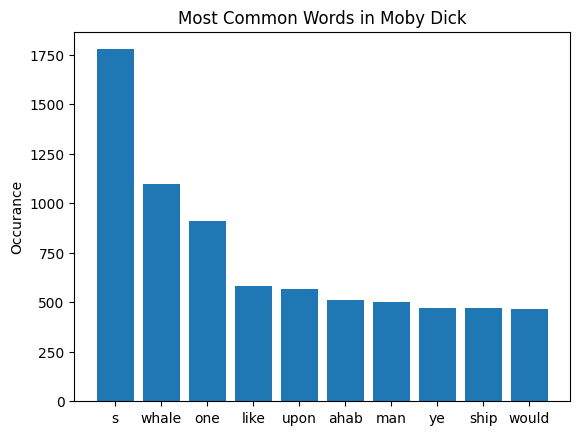

In [13]:
from matplotlib import pyplot as plt

plt.bar(top10df[0], top10df[1])
plt.title('Most Common Words in Moby Dick')
plt.ylabel('Occurance')